In [1]:
import numpy as np
import argparse
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [3]:
#Import the model
colorize_dir = r'C:\Users\trung\Documents\ImageColorization\colorized image'
PROTOTXT = "model/colorization_deploy_v2.prototxt"
POINTS = "model/pts_in_hull.npy"
MODEL = "model/colorization_release_v2.caffemodel"

In [13]:
#Load model
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
pts = np.load(POINTS)

In [10]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

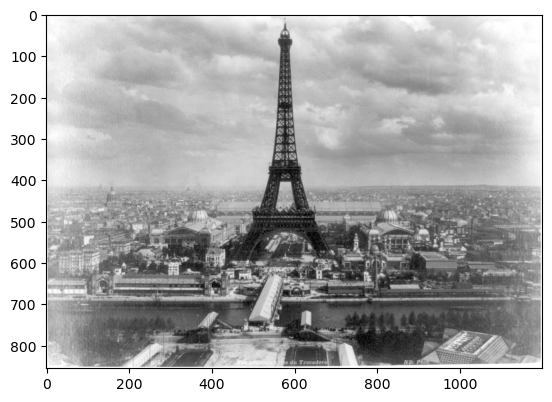

In [11]:
#Read the black and white image
image = cv2.imread("Paris.jpg")
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)
plt.imshow(image, cmap='gray')

In [12]:
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50
print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

Colorizing the image


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\layers\convolution_layer.cpp:359: error: (-215:Assertion failed) !blobs.empty() || inputs.size() > 1 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'


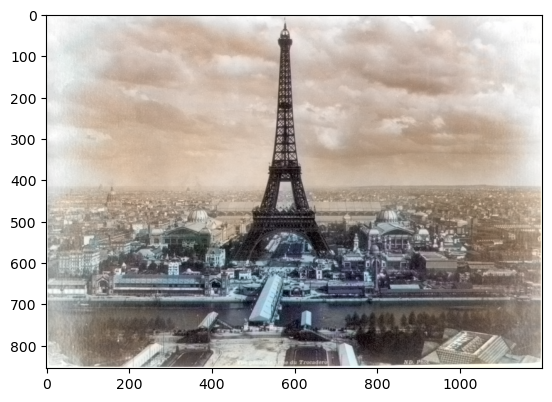

In [8]:
#Display the colorized image
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized, cmap='gray')
img = Image.fromarray(colorized)
#img.show()
#img.save(os.path.join(colorize_dir, "colorized_img.jpg"))